In [3]:
%matplotlib inline
import numpy as np
from pylab import *

In [5]:
np.random.seed(2)

numpy.random.seed



numpy.random.seed(seed=None)
Seed the generator.

This method is called when RandomState is initialized. It can be called again to re-seed the generator. 


Parameters:	
seed : int or 1-d array_like, optional
Seed for RandomState. Must be convertible to 32 bit unsigned integers.

In [6]:
pageSpeeds = np.random.normal(3.0, 1.0, 100)
purchaseAmount = np.random.normal(50.0, 30.0, 100) /pageSpeeds

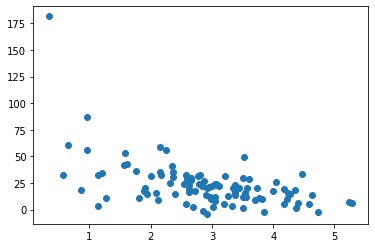

In [7]:
plt.scatter(pageSpeeds, purchaseAmount)

In [18]:
trainX = pageSpeeds[:70]

In [19]:
testX = pageSpeeds[70:]

In [21]:
trainY = purchaseAmount[:70]

In [22]:
testY = purchaseAmount[70:]

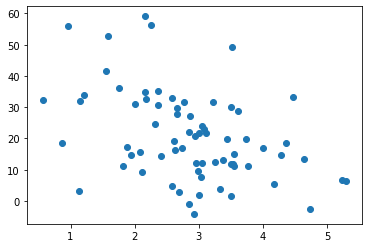

In [23]:
plt.scatter(trainX, trainY)

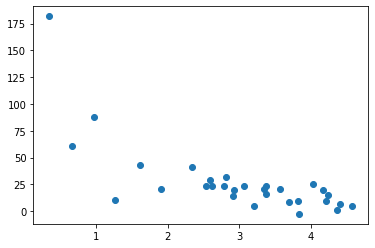

In [24]:
plt.scatter(testX, testY)

In [25]:
x = np.array(trainX)

In [26]:
y = np.array(trainY)

In [27]:
# Polynomial regression

In [28]:
p4 = np.poly1d(np.polyfit(x,y,8))

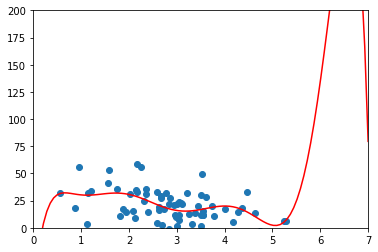

In [32]:
xp = np.linspace(0, 7, 100)
axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()

In [36]:
from sklearn.metrics import r2_score

r2 = r2_score(trainY, p4(trainX))

print(r2)


0.22443635430495223


Axes object is the region of the image with the data space. A given figure can contain many Axes, but a given Axes object can only be in one Figure. The Axes contains two (or three in the case of 3D) Axis objects. The Axes class and its member functions are the primary entry point to working with the OO interface.

Axes object is added to figure by calling the add_axes() method. It returns the axes object and adds an axes at position rect [left, bottom, width, height] where all quantities are in fractions of figure width and height.

matplotlib.axes.Axes.set_xlim() Function:
The Axes.set_xlim() function in axes module of matplotlib library is used to set the x-axis view limits.



Syntax: Axes.set_xlim(self, left=None, right=None, emit=True, auto=False, *, xmin=None, xmax=None)

Parameters: This method accepts the following parameters.

left : This parameter is the left xlim in data coordinates
right : This parameter is the right xlim in data coordinates
emit : This parameter is used to notify observers of limit change.
auto : This parameter is used to turn on autoscaling of the x-axis.
xmin, xmax: These parameter are equivalent to left and right and it is an error to pass both xmin and left or xmax and right.
Returns:This method returns the following



left, right :This returns the new x-axis limits in data coordinates.


matplotlib.axes.Axes.set_ylim
Axes.set_ylim(self, bottom=None, top=None, emit=True, auto=False, *, ymin=None, ymax=None)
Set the y-axis view limits.

Parameters:	
bottom : scalar, optional
The bottom ylim in data coordinates. Passing None leaves the limit unchanged.

The bottom and top ylims may be passed as the tuple (bottom, top) as the first positional argument (or as the bottom keyword argument).

top : scalar, optional
The top ylim in data coordinates. Passing None leaves the limit unchanged.

emit : bool, optional
Whether to notify observers of limit change (default: True).

auto : bool or None, optional
Whether to turn on autoscaling of the y-axis. True turns on, False turns off (default action), None leaves unchanged.

ymin, ymax : scalar, optional
They are equivalent to bottom and top respectively, and it is an error to pass both ymin and bottom or ymax and top.

Returns:	
bottom, top : (float, float)
The new y-axis limits in data coordinates.

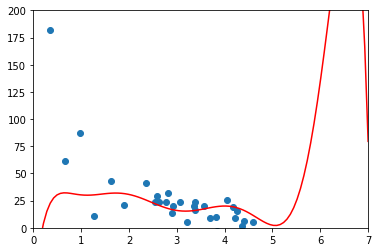

In [33]:
testx = np.array(testX)
testy = np.array(testY)

axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0,200])
plt.scatter(testx, testy)
plt.plot(xp,p4(xp), c='r')
plt.show()

In [34]:
from sklearn.metrics import r2_score

r2 = r2_score(testy, p4(testx))

print(r2)

0.048961389981029724


# XGBoost

In [37]:
from sklearn.datasets import load_iris

In [38]:
iris = load_iris()

sklearn.datasets.load_iris(*, return_X_y=False, as_frame=False)

oad and return the iris dataset (classification).

The iris dataset is a classic and very easy multi-class classification dataset.

Classes

3

Samples per class

50

Samples total

150

Dimensionality

4

Features

real, positive

Parameters
return_X_ybool, default=False
If True, returns (data, target) instead of a Bunch object. See below for more information about the data and target object.

New in version 0.18.

as_framebool, default=False
If True, the data is a pandas DataFrame including columns with appropriate dtypes (numeric). The target is a pandas DataFrame or Series depending on the number of target columns. If return_X_y is True, then (data, target) will be pandas DataFrames or Series as described below

In [39]:
numSamples, numfeatures = iris.data.shape

In [40]:
print(numSamples)

150


In [42]:
print(numfeatures)

4


In [43]:
print(list(iris.target_names))

['setosa', 'versicolor', 'virginica']


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2, random_state = 0)

In [47]:
import xgboost as xgb

train = xgb.DMatrix(X_train, label = y_train)
test = xgb.DMatrix(X_test, label = y_test)

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. 


It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. 


The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) artificial neural networks tend to outperform all other algorithms or frameworks. However, when it comes to small-to-medium structured/tabular data, decision tree based algorithms are considered best-in-class right now. 

In [51]:
param = {
    'max_depth': 4,
    'eta':0.3,
    'objective': 'multi:softmax',
    'num_class' :3
}
epochs = 10

XGBoost Advantage


I’ve always admired the boosting capabilities that this algorithm infuses in a predictive model. When I explored more about its performance and science behind its high accuracy, I discovered many advantages:



Regularization:
Standard GBM implementation has no regularization like XGBoost, therefore it also helps to reduce overfitting.
In fact, XGBoost is also known as a ‘regularized boosting‘ technique.



Parallel Processing:
XGBoost implements parallel processing and is blazingly faster as compared to GBM.

XGBoost also supports implementation on Hadoop.


High Flexibility
XGBoost allows users to define custom optimization objectives and evaluation criteria.
This adds a whole new dimension to the model and there is no limit to what we can do.


Handling Missing Values
XGBoost has an in-built routine to handle missing values.
The user is required to supply a different value than other observations and pass that as a parameter. XGBoost tries different things as it encounters a missing value on each node and learns which path to take for missing values in future.



Tree Pruning:
A GBM would stop splitting a node when it encounters a negative loss in the split. Thus it is more of a greedy algorithm.
XGBoost on the other hand make splits upto the max_depth specified and then start pruning the tree backwards and remove splits beyond which there is no positive gain.
Another advantage is that sometimes a split of negative loss say -2 may be followed by a split of positive loss +10. GBM would stop as it encounters -2. But XGBoost will go deeper and it will see a combined effect of +8 of the split and keep both.
Built-in Cross-Validation



XGBoost allows user to run a cross-validation at each iteration of the boosting process and thus it is easy to get the exact optimum number of boosting iterations in a single run.
This is unlike GBM where we have to run a grid-search and only a limited values can be tested.
Continue on Existing Model
User can start training an XGBoost model from its last iteration of previous run. This can be of significant advantage in certain specific applications.
GBM implementation of sklearn also has this feature so they are even on this point.

XGBoost Parameters
The overall parameters have been divided into 3 categories by XGBoost authors:

General Parameters: Guide the overall functioning
Booster Parameters: Guide the individual booster (tree/regression) at each step
Learning Task Parameters: Guide the optimization performed
I will give analogies to GBM here and highly recommend to read this article to learn from the very basics.




General Parameters
These define the overall functionality of XGBoost.

booster [default=gbtree]
Select the type of model to run at each iteration. It has 2 options:
gbtree: tree-based models
gblinear: linear models
silent [default=0]:
Silent mode is activated is set to 1, i.e. no running messages will be printed.
It’s generally good to keep it 0 as the messages might help in understanding the model.
nthread [default to maximum number of threads available if not set]
This is used for parallel processing and number of cores in the system should be entered
If you wish to run on all cores, value should not be entered and algorithm will detect automatically
There are 2 more parameters which are set automatically by XGBoost and you need not worry about them. Lets move on to Booster parameters.

 

Booster Parameters
Though there are 2 types of boosters, I’ll consider only tree booster here because it always outperforms the linear booster and thus the later is rarely used.

eta [default=0.3]
Analogous to learning rate in GBM
Makes the model more robust by shrinking the weights on each step
Typical final values to be used: 0.01-0.2
min_child_weight [default=1]
Defines the minimum sum of weights of all observations required in a child.
This is similar to min_child_leaf in GBM but not exactly. This refers to min “sum of weights” of observations while GBM has min “number of observations”.
Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.
Too high values can lead to under-fitting hence, it should be tuned using CV.
max_depth [default=6]
The maximum depth of a tree, same as GBM.
Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.
Should be tuned using CV.
Typical values: 3-10
max_leaf_nodes
The maximum number of terminal nodes or leaves in a tree.
Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves.
If this is defined, GBM will ignore max_depth.
gamma [default=0]
A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.
Makes the algorithm conservative. The values can vary depending on the loss function and should be tuned.
max_delta_step [default=0]
In maximum delta step we allow each tree’s weight estimation to be. If the value is set to 0, it means there is no constraint. If it is set to a positive value, it can help making the update step more conservative.
Usually this parameter is not needed, but it might help in logistic regression when class is extremely imbalanced.
This is generally not used but you can explore further if you wish.
subsample [default=1]
Same as the subsample of GBM. Denotes the fraction of observations to be randomly samples for each tree.
Lower values make the algorithm more conservative and prevents overfitting but too small values might lead to under-fitting.
Typical values: 0.5-1
colsample_bytree [default=1]
Similar to max_features in GBM. Denotes the fraction of columns to be randomly samples for each tree.
Typical values: 0.5-1
colsample_bylevel [default=1]
Denotes the subsample ratio of columns for each split, in each level.
I don’t use this often because subsample and colsample_bytree will do the job for you. but you can explore further if you feel so.
lambda [default=1]
L2 regularization term on weights (analogous to Ridge regression)
This used to handle the regularization part of XGBoost. Though many data scientists don’t use it often, it should be explored to reduce overfitting.
alpha [default=0]
L1 regularization term on weight (analogous to Lasso regression)
Can be used in case of very high dimensionality so that the algorithm runs faster when implemented
scale_pos_weight [default=1]
A value greater than 0 should be used in case of high class imbalance as it helps in faster convergence.
 

Learning Task Parameters
These parameters are used to define the optimization objective the metric to be calculated at each step.

objective [default=reg:linear]
This defines the loss function to be minimized. Mostly used values are:
binary:logistic –logistic regression for binary classification, returns predicted probability (not class)
multi:softmax –multiclass classification using the softmax objective, returns predicted class (not probabilities)
you also need to set an additional num_class (number of classes) parameter defining the number of unique classes
multi:softprob –same as softmax, but returns predicted probability of each data point belonging to each class.
eval_metric [ default according to objective ]
The metric to be used for validation data.
The default values are rmse for regression and error for classification.
Typical values are:
rmse – root mean square error
mae – mean absolute error
logloss – negative log-likelihood
error – Binary classification error rate (0.5 threshold)
merror – Multiclass classification error rate
mlogloss – Multiclass logloss
auc: Area under the curve
seed [default=0]
The random number seed.
Can be used for generating reproducible results and also for parameter tuning.
If you’ve been using Scikit-Learn till now, these parameter names might not look familiar. A good news is that xgboost module in python has an sklearn wrapper called XGBClassifier. It uses sklearn style naming convention. The parameters names which will change are:

eta –> learning_rate
lambda –> reg_lambda
alpha –> reg_alpha
You must be wondering that we have defined everything except something similar to the “n_estimators” parameter in GBM. Well this exists as a parameter in XGBClassifier. However, it has to be passed as “num_boosting_rounds” while calling the fit function in the standard xgboost implementation.

I recommend you to go through the following parts of xgboost guide to better understand the parameters and codes:

XGBoost Parameters (official guide)
XGBoost Demo Codes (xgboost GitHub repository)
Python API Reference (official guide)
 

3. Parameter Tuning with Example
We will take the data set from Data Hackathon 3.x AV hackathon, same as that taken in the GBM article. The details of the problem can be found on the competition page. You can download the data set from here. I have performed the following steps:

City variable dropped because of too many categories
DOB converted to Age | DOB dropped
EMI_Loan_Submitted_Missing created which is 1 if EMI_Loan_Submitted was missing else 0 | Original variable EMI_Loan_Submitted dropped
EmployerName dropped because of too many categories
Existing_EMI imputed with 0 (median) since only 111 values were missing
Interest_Rate_Missing created which is 1 if Interest_Rate was missing else 0 | Original variable Interest_Rate dropped
Lead_Creation_Date dropped because made little intuitive impact on outcome
Loan_Amount_Applied, Loan_Tenure_Applied imputed with median values
Loan_Amount_Submitted_Missing created which is 1 if Loan_Amount_Submitted was missing else 0 | Original variable Loan_Amount_Submitted dropped
Loan_Tenure_Submitted_Missing created which is 1 if Loan_Tenure_Submitted was missing else 0 | Original variable Loan_Tenure_Submitted dropped
LoggedIn, Salary_Account dropped
Processing_Fee_Missing created which is 1 if Processing_Fee was missing else 0 | Original variable Processing_Fee dropped
Source – top 2 kept as is and all others combined into different category
Numerical and One-Hot-Coding performed

In [52]:
model = xgb.train(param, train, epochs)

[17:12:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [55]:
predictions = model.predict(test)

In [56]:
print(predictions)

[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 1. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0.]


In [57]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

1.0